# Train Ensemble of Bagged Classification Trees

Load Fisher's Iris Dataset.

In [1]:
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

with open('/content/drive/My Drive/Colab Notebooks/data/iris.csv', 'r') as f: 
    tmp = np.genfromtxt(f, dtype='f4', delimiter=',')

X = tmp[:,0:4]
Y = tmp[:,4]


Mounted at /content/drive


Partition the data into Training and Testing (7:3 split)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


Train a random forest classifier using the training data set. Specify 50 Learners. 

In [3]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, oob_score=True)
clf = clf.fit(X_train, y_train)

print(clf.get_params)

<bound method BaseEstimator.get_params of RandomForestClassifier(n_estimators=50, oob_score=True)>


Predict output using Xtest.

In [4]:
y_hat = clf.predict(X_test)

Analyze the results.

In [5]:
 from sklearn.metrics import confusion_matrix

Cmat = confusion_matrix(y_test, y_hat)
acc = clf.score(X_test,y_test)

print("Confusion Matrix: ")
print(Cmat)
print("Accuracy: " + str(acc*100) + '%')

Confusion Matrix: 
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Accuracy: 100.0%


Plot a graph of the first trained classification tree. 


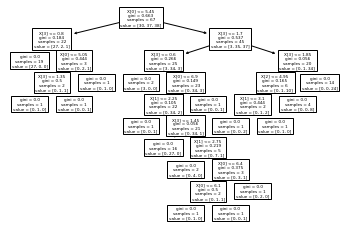

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plot_tree(clf.estimators_[0])
plt.show()

Plot the out-of-bag error over the number of grown classification trees. 

In [7]:
min_estimators = 1
max_estimators = 50
error_rate = []

for i in range(min_estimators, max_estimators + 1):
  clf.set_params(n_estimators=i)
  clf.fit(X_test, y_test)
  # Record the OOB error for each `n_estimators=i` setting.
  oob_error = 1 - clf.oob_score_
  error_rate.append(oob_error)      

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. Thi

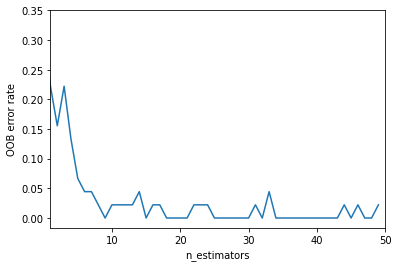

In [8]:
plt.plot(error_rate)
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.show()